Рассматривается линейная модель ARMA(1,1)
h_n-a_1 h_(n-1)=a_0+ε_n+b_1 ε_(n-1),n∈Z
где {ε_n } – обобщенный белый шум: Mε_n=0,cov(ε_i,ε_j )=σ^2 δ_ij  

Задание.
	Найти представление в виде одностороннего скользящего среднего для ССМ {h_n }

	Вычислить теоретические характеристики Mh_n,Dh_n,cov(h_n,h_(n+j) )

	Смоделировать реализацию СП (h_0,h_1,…..,h_N ),N=1000,                       с начальным условием h_0=0 и выбранными самостоятельно значениями параметров a_0,a_1,b_1,σ
(например, a_0=1,a_1=0.5,b_1=0.1,σ=0.2, обязательно |a_1 |<1)
для двух вариантов белого шума:
А) ε_n~N(0,σ)
Б) ε_n~R(-√3 σ;√3 σ)

	Вывести на печать графики полученных реализаций
	Вычислить эмпирические характеристики полученных реализаций, начиная с момента l установки стационарного режима (l выбирается самостоятельно после анализа результатов моделирования)
(h_N ) ̅=1/(N-l) ∑_(k=l)^N▒h_k ,(σ_N^2 ) ̂=1/(N-l) ∑_(k=l)^N▒(h_k-(h_N ) ̅ )^2 ,
 (K_N ) ̂(j)=1/(N-l) ∑_(k=j+1+l)^N▒(h_k-(h_N ) ̅ )(h_(k-j)-(h_N ) ̅ ) ,j=1,2,3
 и сравнить с теоретическими значениями

	Сформулировать выводы.


In [ ]:
import numpy as np
import scipy as sp
import seaborn as sb
import math
import matplotlib.pyplot as plt
import random

In [ ]:
N=1000
h_1=[]
h_1.append(0)
h_2=[]
h_2.append(0)
alpha_0=1
alpha_1=0.4
beta_1=0.2
sigma=0.2

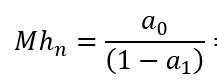

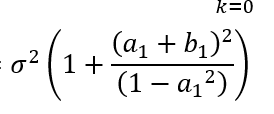

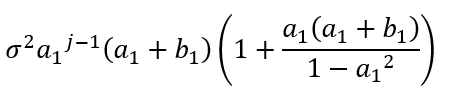

In [ ]:
Mhn=alpha_0/(1-alpha_1)
Mhn

1.6666666666666667

In [ ]:
Dhn=(sigma**2)*(1+((alpha_1+beta_1)**2)/(1-alpha_1**2))
Dhn

0.05714285714285716

In [ ]:
j=3
covhn=(sigma**2)*alpha_1**(j-1)*(alpha_1+beta_1)*(1+(alpha_1*(alpha_1+beta_1))/(1-alpha_1**2))
covhn

0.00493714285714286

In [ ]:
epsilon_1=[]
for i in range(N):
  epsilon_1.append(round(random.normalvariate(0,sigma), 3))

np.savetxt('epsilon_1.txt', epsilon_1, fmt='%f')


epsilon_1 = np.loadtxt('epsilon_1.txt', dtype=float)


In [ ]:
epsilon_2=[]
for i in range(N):
  epsilon_2.append(round(np.random.uniform(-(3**0.5)*sigma,(3**0.5)*sigma), 3))

np.savetxt('epsilon_2.txt', epsilon_2, fmt='%f')


epsilon_2 = np.loadtxt('epsilon_2.txt', dtype=float)


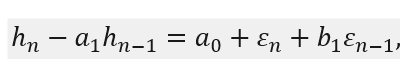

In [ ]:
for i in range(1,N):
  h_1.append(alpha_0+epsilon_1[i]+beta_1*epsilon_1[i-1]+alpha_1*h_1[i-1])

In [ ]:
for i in range(1,N):
  h_2.append(alpha_0+epsilon_2[i]+beta_1*epsilon_2[i-1]+alpha_1*h_2[i-1])

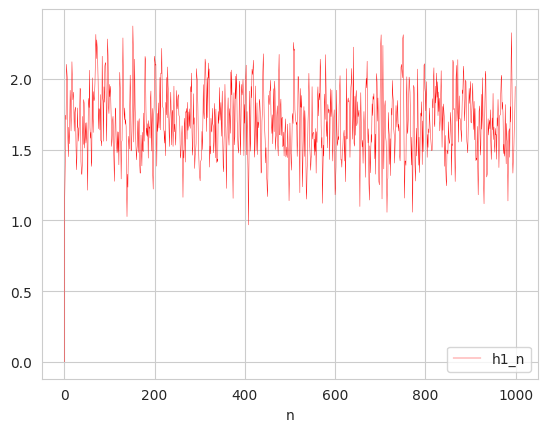

<Figure size 300x1000 with 0 Axes>

In [ ]:
xx = np.arange (0, N)
sb.set_style("whitegrid")
plt.plot(xx, h_1, color='red',label='h1_n', lw='0.3')
plt.xlabel("n")
plt.legend()
plt.figure(figsize=(3, 10))
plt.show()

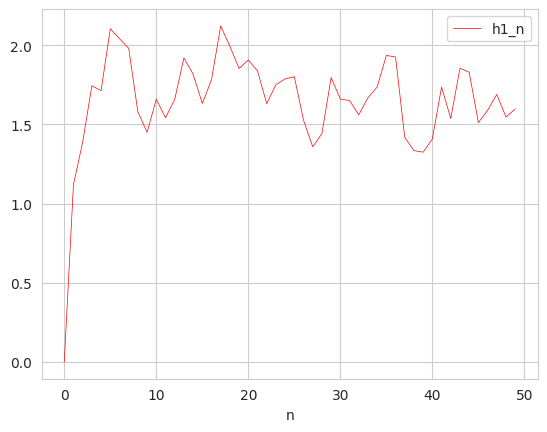

<Figure size 300x1000 with 0 Axes>

In [ ]:
h11=h_1[:50]

xx = np.arange (0,50)
sb.set_style("whitegrid")
plt.plot(xx, h11, color='red',label='h1_n', lw='0.5')
plt.xlabel("n")
plt.legend()
plt.figure(figsize=(3, 10))
plt.show()

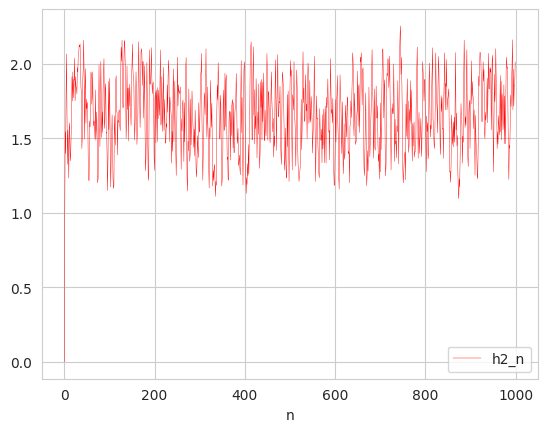

<Figure size 300x1000 with 0 Axes>

In [ ]:
xx = np.arange (0, N)
sb.set_style("whitegrid")
plt.plot(xx, h_2, color='red',label='h2_n', lw='0.3')
plt.xlabel("n")
plt.legend()
plt.figure(figsize=(3, 10))
plt.show()

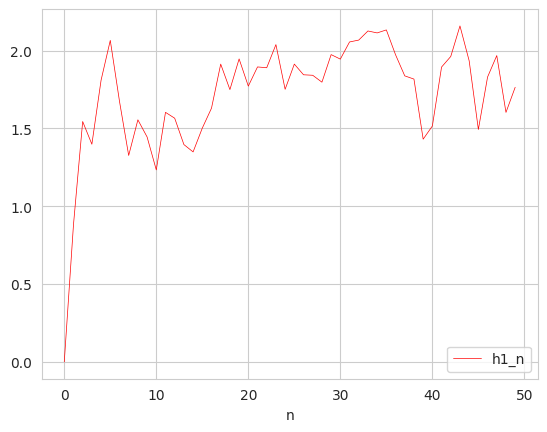

<Figure size 300x1000 with 0 Axes>

In [ ]:
h22=h_2[:50]

xx = np.arange (0,50)
sb.set_style("whitegrid")
plt.plot(xx, h22, color='red',label='h1_n', lw='0.5')
plt.xlabel("n")
plt.legend()
plt.figure(figsize=(3, 10))
plt.show()

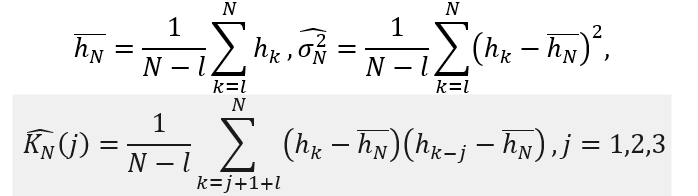

In [ ]:
sum=0
l=20
for i in range(l,N):
  sum+=h_1[i]
h1n=1/(N-l)*sum
h1n

1.6893428077771053

In [ ]:
sum=0
l=20
for i in range(l,N):
  sum+=h_2[i]
h2n=1/(N-l)*sum
h2n

1.6551880305015612

In [ ]:
sum=0
l=20
for i in range(l,N):
  sum+=(h_1[i]-h1n)**2
s1n=1/(N-l)*sum
s1n

0.05529325711039019

In [ ]:
sum=0
l=20
for i in range(l,N):
  sum+=(h_2[i]-h2n)**2
s2n=1/(N-l)*sum
s2n

0.05814941012826813

In [ ]:
sum=0
l=20
j=3
for i in range(j+1+l,N):
  sum+=(h_1[i]-h1n)*(h_1[i-j]-h1n)
K1n=1/(N-l)*sum
K1n

0.0022400282513348434

In [ ]:
sum=0
l=20
j=3
for i in range(j+1+l,N):
  sum+=(h_2[i]-h2n)*(h_2[i-j]-h2n)
K2n=1/(N-l)*sum
K2n

0.005101937268411173